In [48]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder # change labels y to values 
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('iris.csv')
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
X = df.drop(columns='variety').values  #df->np.array
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
y = df['variety']
y.head(5)

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [5]:
y= LabelEncoder().fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
y_predict = knn.predict(X_test)   
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2])

In [10]:
print(classification_report(y_test,y_predict))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [11]:
confusion_matrix(y_test,y_predict)

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]])

In [12]:
accuracy_score(y_test,y_predict)

0.96

## Use another k=5

In [13]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train,y_train)
y_predict2 = knn2.predict(X_test)   
print(classification_report(y_test,y_predict2)) 
print(confusion_matrix(y_test,y_predict2))
print(accuracy_score(y_test,y_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]
0.98


## Use another k=1

In [14]:
knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(X_train,y_train)
y_predict3 = knn3.predict(X_test)   
print(classification_report(y_test,y_predict3)) 
print(confusion_matrix(y_test,y_predict3))
print(accuracy_score(y_test,y_predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
0.96


## Find the best k

In [15]:
kRange=range(1,25)
scores=[]
for k in kRange:
    knnN=KNeighborsClassifier(n_neighbors=k)
    knnN.fit(X_train,y_train)
    y_predN = knnN.predict(X_test)   
    scores.append(accuracy_score(y_test,y_predN))

Text(0, 0.5, 'Testing accuracy')

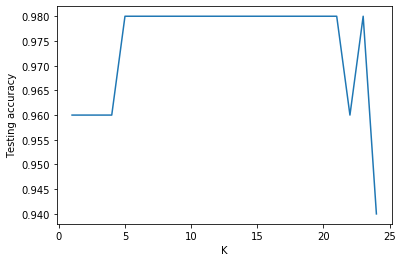

In [16]:
plt.plot(kRange,scores)
plt.xlabel('K')
plt.ylabel('Testing accuracy')

## Conclusions
- Training accuracy rises as model complexity increases
- Testing accuracy penalizes models that are too complex or too simple 
- For KNN, complexity is determined by K, lower K means more complex

## Find the best k by using CV

In [49]:
kRangeCV=range(1,31)
scoresCV=[]
for k in kRangeCV:
    knnCV=KNeighborsClassifier(n_neighbors=k)
    scoreCV=cross_val_score(knnCV,X,y,cv=10,scoring='accuracy')
    scoresCV.append(scoreCV.mean())
print(scoresCV)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'CV accuracy')

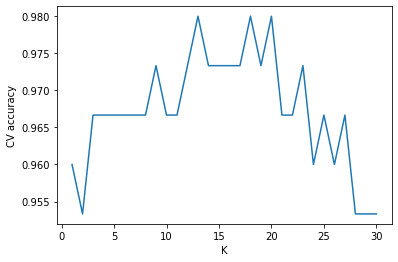

In [50]:
plt.plot(kRangeCV,scoresCV)
plt.xlabel('K')
plt.ylabel('CV accuracy')
# best k = 13

## More efficient parameter tuning using GridSearchCV
### Allows you to define a grid of parameters that will be searched using K-fold CV

In [21]:
kRange = range(1,31)
paramGrid=dict(n_neighbors=kRange)
paramGrid

{'n_neighbors': range(1, 31)}

In [41]:
grid = GridSearchCV(knn,paramGrid,cv=10,scoring='accuracy')
grid.fit(X,y)
grid.cv_results_  #30 k, 10 cv, fit 300 times

{'mean_fit_time': array([0.00083387, 0.00065656, 0.00059247, 0.00040081, 0.00037775,
        0.00044935, 0.00040603, 0.00040789, 0.00041914, 0.00038426,
        0.00037155, 0.00039418, 0.00040004, 0.00039747, 0.00040355,
        0.00039933, 0.00054767, 0.00045323, 0.00053225, 0.00052857,
        0.00052698, 0.00051472, 0.00053263, 0.0005863 , 0.00054233,
        0.00045297, 0.00045404, 0.00045173, 0.00043404, 0.00044286]),
 'std_fit_time': array([3.24270676e-04, 2.03500915e-04, 3.41178236e-04, 4.48101932e-05,
        7.31692597e-06, 9.07332312e-05, 3.17900578e-05, 7.50427013e-05,
        7.45155519e-05, 3.59003362e-05, 4.23714826e-06, 2.93679144e-05,
        4.03779233e-05, 3.64236879e-05, 3.84511148e-05, 3.31047352e-05,
        2.85203524e-04, 1.41759725e-04, 1.98099764e-04, 1.67201846e-04,
        1.47487400e-04, 1.82956659e-04, 3.07270402e-04, 3.03600508e-04,
        2.61503994e-04, 1.01769743e-04, 1.07402116e-04, 9.83838275e-05,
        4.75668966e-05, 9.69818235e-05]),
 'mean_scor

In [39]:
print(grid.cv_results_['params'][0])
print(grid.cv_results_['split0_test_score'])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.93333333 1.         0.93333333 1.
 0.93333333 1.         0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333]
0.96


In [42]:
gridMeanScores=grid.cv_results_['mean_test_score']
gridMeanScores

array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
       0.96666667, 0.97333333, 0.98      , 0.97333333, 0.97333333,
       0.97333333, 0.97333333, 0.98      , 0.97333333, 0.98      ,
       0.96666667, 0.96666667, 0.97333333, 0.96      , 0.96666667,
       0.96      , 0.96666667, 0.95333333, 0.95333333, 0.95333333])

Text(0, 0.5, 'Testing accuracy')

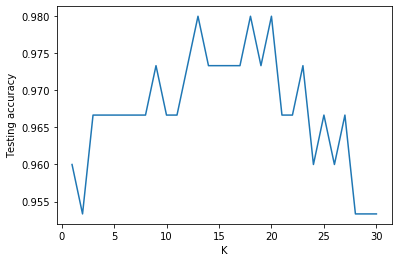

In [43]:
plt.plot(kRange,gridMeanScores)
plt.xlabel('K')
plt.ylabel('Testing accuracy')

In [46]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')
